# House Rent Prediction

#### Imports

In [126]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [47]:
sns.set_style('white')

#### Data

In [48]:
df = pd.read_csv('House_Rent_Dataset.csv')
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [49]:
df.shape

(4746, 12)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


#### Check for Missing Values

In [51]:
df.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

#### Check for Duplicate Entries

In [52]:
df.duplicated().sum()

0

## EDA

### Overall

#### Descriptive Statistics

In [53]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


#### Correlation

In [54]:
corr_matrix = df[df.dtypes[df.dtypes == 'int64'].index].corr()
corr_matrix

,BHK,Rent,Size,Bathroom
BHK,1.000000,0.369718,0.716145,0.794885
Rent,0.369718,1.000000,0.413551,0.441215
Size,0.716145,0.413551,1.000000,0.740703
Bathroom,0.794885,0.441215,0.740703,1.000000


<Axes: >

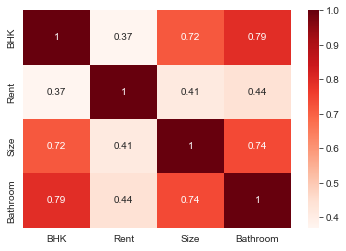

In [55]:
sns.heatmap(corr_matrix, annot=True, cmap='Reds')

### Univariate Analysis

#### Distribution of Rent (Target Variable)

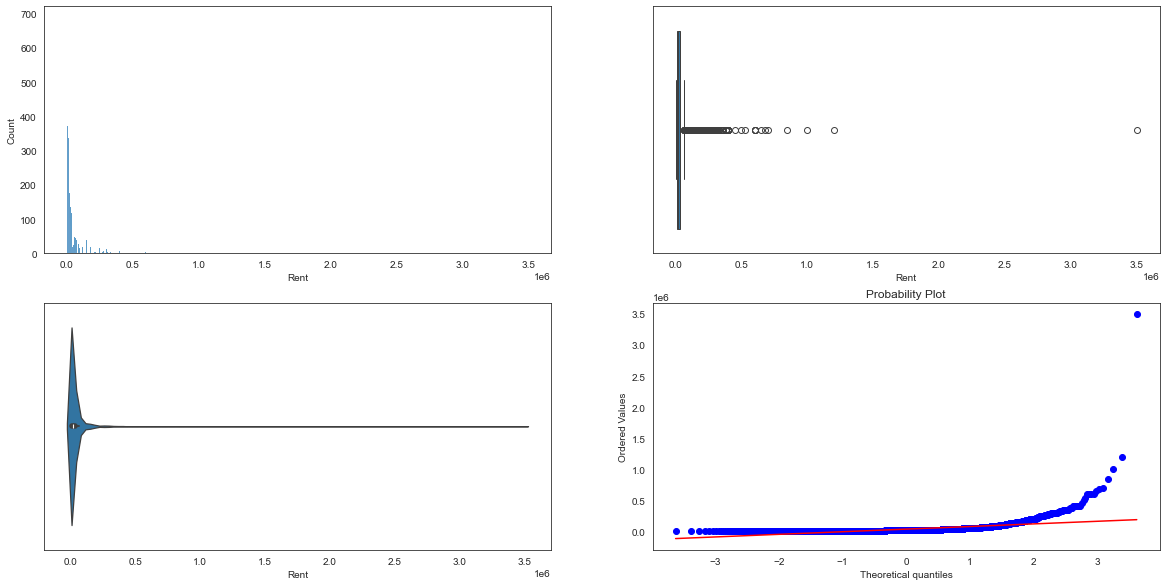

In [56]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
(ax1, ax2), (ax3, ax4) = axs
sns.histplot(x='Rent', data=df, ax=ax1)
sns.boxplot(x='Rent', data=df, ax=ax2)
sns.violinplot(x='Rent', data=df, ax=ax3)
stats.probplot(x=df['Rent'], plot=ax4)
plt.draw()

Remove the observations beyond 99t quantile

In [57]:
rent_q99 = df.groupby('BHK')['Rent'].quantile(.99)
print(rent_q99)
temp_df = pd.merge(left=df['BHK'], right=rent_q99.rename('Rent_q99'), on='BHK', how='left')
temp_df.head()
df = df.drop(index=df[df['Rent'] > temp_df['Rent_q99']].index)

BHK
1     61700.0
2    123600.0
3    300000.0
4    868000.0
5    641000.0
6    266000.0
Name: Rent, dtype: float64


After removing observations beyond 99th quantile

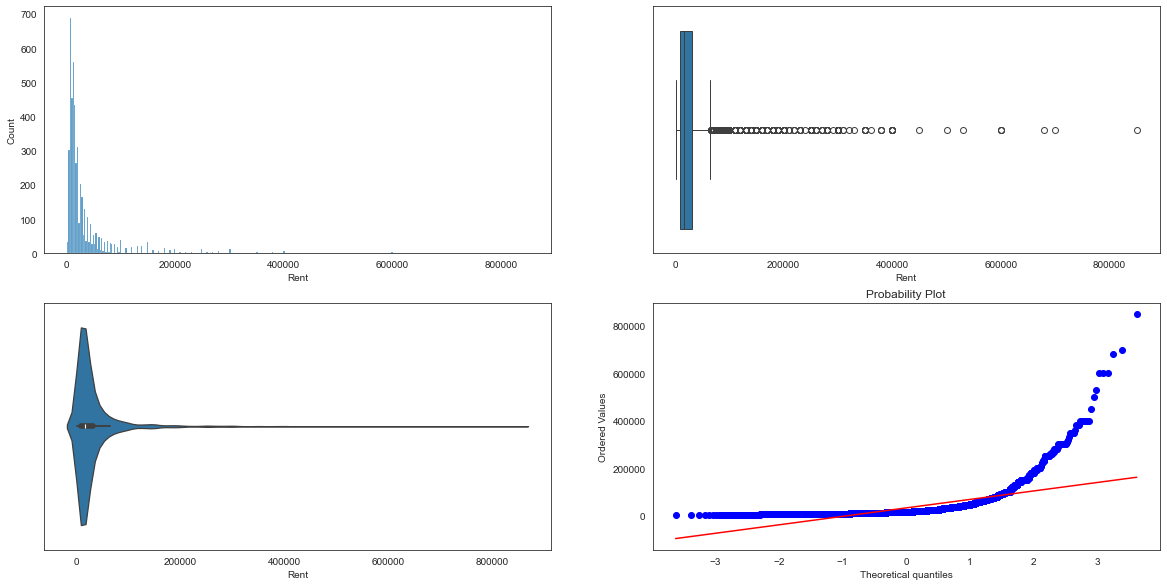

In [58]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
(ax1, ax2), (ax3, ax4) = axs
sns.histplot(x='Rent', data=df, ax=ax1)
sns.boxplot(x='Rent', data=df, ax=ax2)
sns.violinplot(x='Rent', data=df, ax=ax3)
stats.probplot(x=df['Rent'], plot=ax4)
plt.draw()

After applying Boxcox transform

In [59]:
boxcox_y, lam = stats.boxcox(df['Rent'])

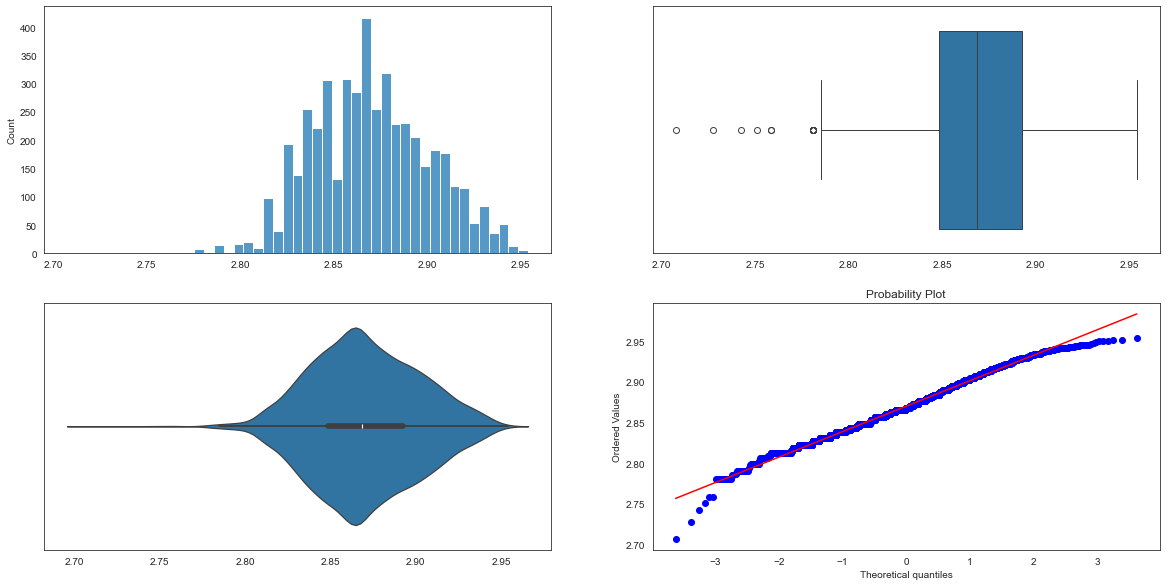

In [60]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
(ax1, ax2), (ax3, ax4) = axs
sns.histplot(x=boxcox_y, ax=ax1)
sns.boxplot(x=boxcox_y, ax=ax2)
sns.violinplot(x=boxcox_y, ax=ax3)
stats.probplot(x=boxcox_y, plot=ax4)
plt.draw()

#### Distribution of BHK

In [147]:
axs

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

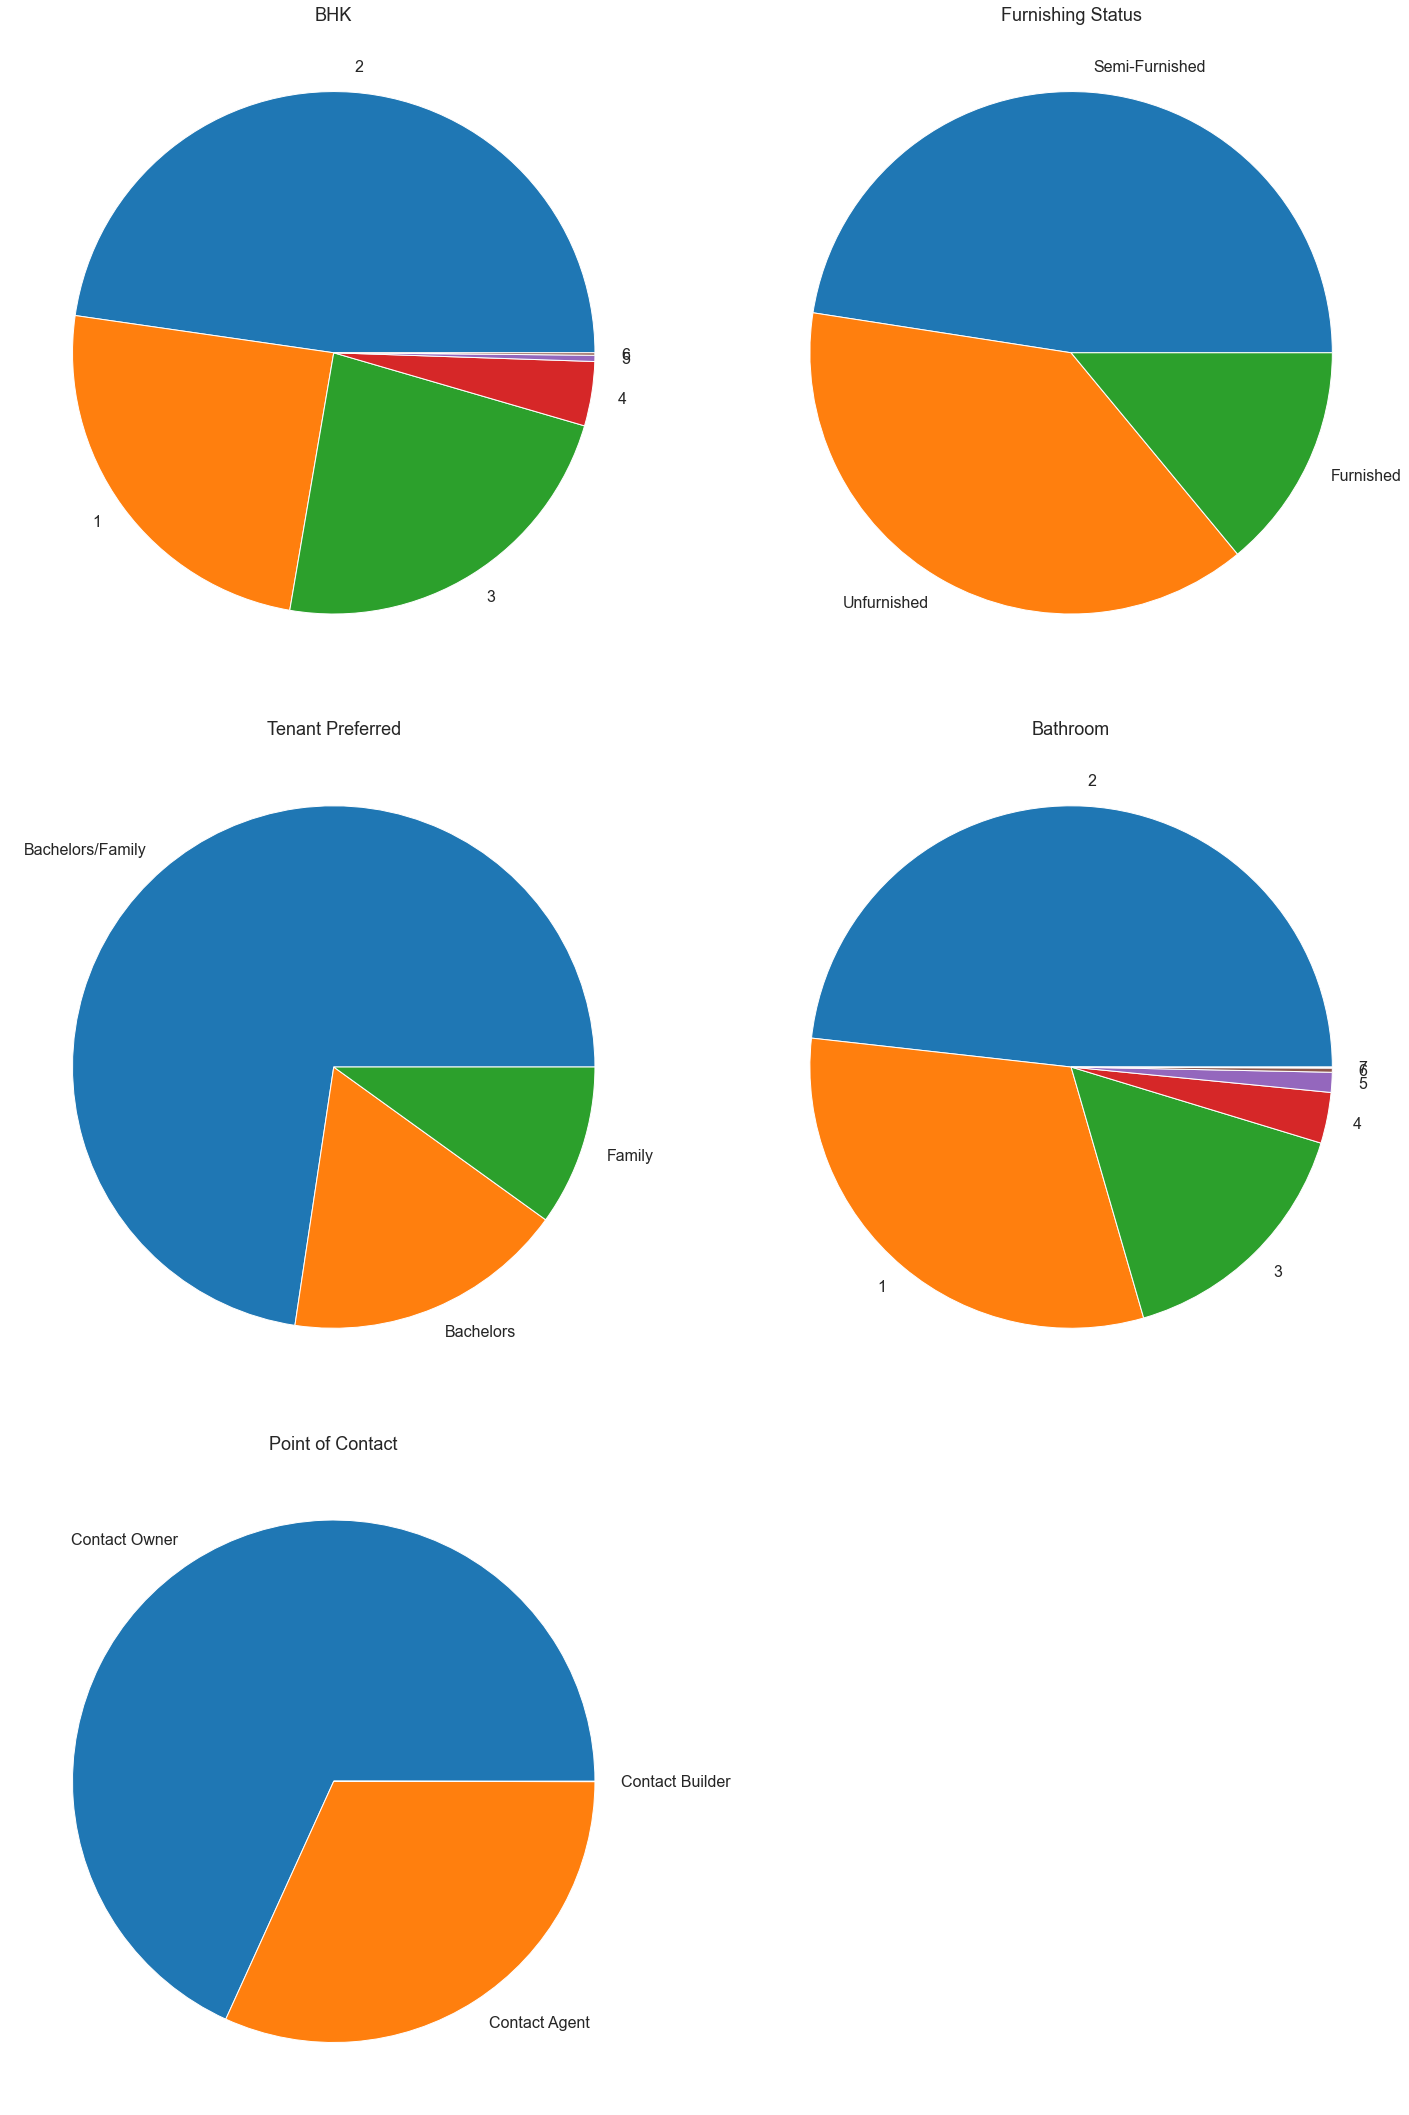

In [160]:
mpl.rcParams['font.size'] = 16
features = np.array(['BHK', 'Furnishing Status', 'Tenant Preferred','Bathroom', 'Point of Contact', ''])
features = cols.reshape(3,2)
fig, axs = plt.subplots(*cols.shape)
fig.set_figheight(30)
fig.set_figwidth(20)
for ax_row, feature_row in zip(axs, features):
    for ax, feature in zip(ax_row, feature_row):
        plt.sca(ax)
        if feature != '':
            vc = df[feature].value_counts()
            plt.pie(x=vc.to_numpy(), labels=vc.index)
            ax.set_title(feature, fontsize=18)
        else: 
            ax.set_visible(False)

plt.tight_layout()
plt.draw()
    

In [75]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

#### Distribution of Size 

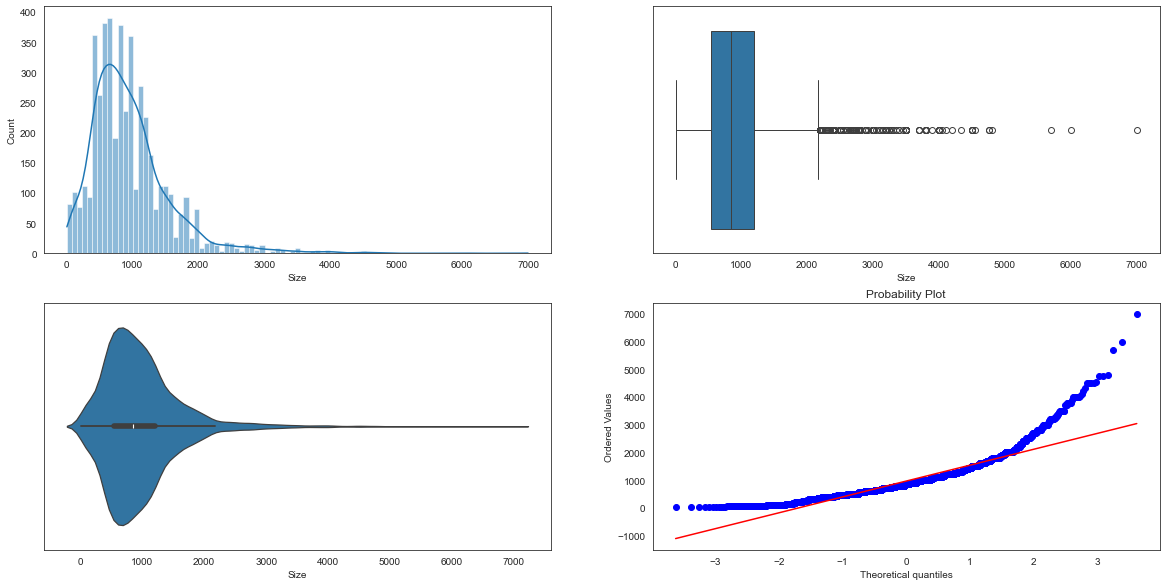

In [72]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
(ax1, ax2), (ax3, ax4) = axs
sns.histplot(x='Size', data=df, ax=ax1, kde=True)
sns.boxplot(x='Size', data=df, ax=ax2)
sns.violinplot(x='Size', data=df, ax=ax3)
stats.probplot(x=df['Size'], plot=ax4)
plt.draw()

Applying boxcox transfor to Size

In [73]:
boxcox_y, lam = stats.boxcox(df['Size'])

Distribution after applying boxcox

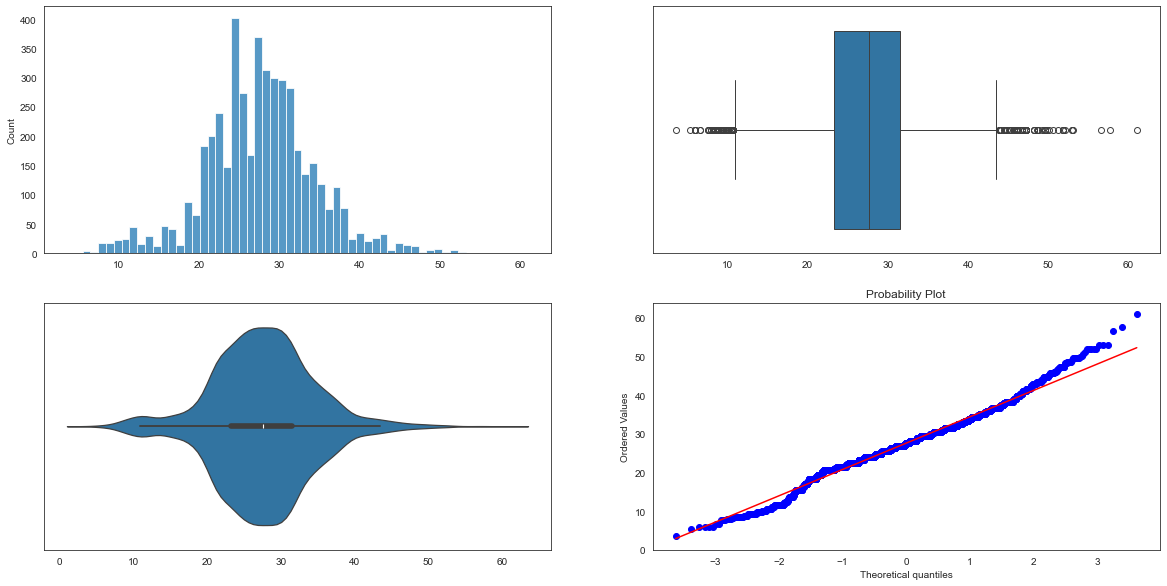

In [74]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
(ax1, ax2), (ax3, ax4) = axs
sns.histplot(x=boxcox_y, ax=ax1)
sns.boxplot(x=boxcox_y, ax=ax2)
sns.violinplot(x=boxcox_y, ax=ax3)
stats.probplot(x=boxcox_y, plot=ax4)
plt.draw()

### Bivariate Analysis

Bar plot for number of houses available for rent in each city

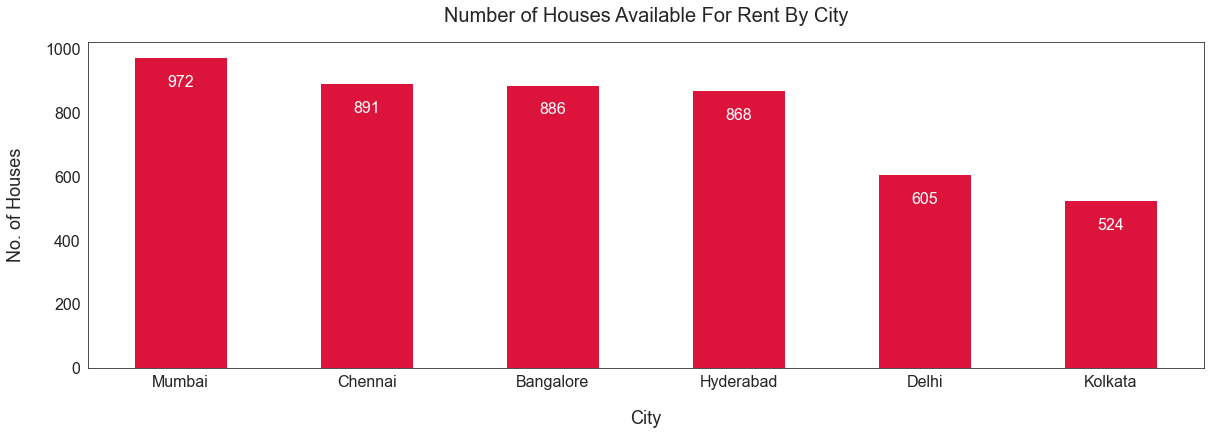

In [31]:
plt.figure(figsize=(20, 6))

# could've been a seaborn count plot
ax = df['City'].value_counts().sort_values(ascending=False).plot(
    kind='bar', 
    color='crimson', 
    rot=0,
)


ax.set_title('Number of Houses Available For Rent By City', fontsize=20, pad=20)
ax.set_xlabel('City', fontsize=18, labelpad=20)
ax.set_ylabel('No. of Houses', fontsize=18, labelpad=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

for bar in ax.patches:
    ax.annotate(
        text=int(bar.get_height()), 
        xy=(bar.get_x() + 0.25, bar.get_height() - 100), 
        fontsize=16, 
        ha='center',
        va='bottom',
        color='white'
    )

plt.draw()

Median Rent by City

In [54]:
cities_sorted_by_median_rent =  df.groupby('City', observed=True)['Rent'].median().sort_values(ascending=False)
cities_sorted_by_median_rent

City
Mumbai       52000.0
Delhi        17000.0
Bangalore    14000.0
Chennai      14000.0
Hyderabad    14000.0
Kolkata       8500.0
Name: Rent, dtype: float64

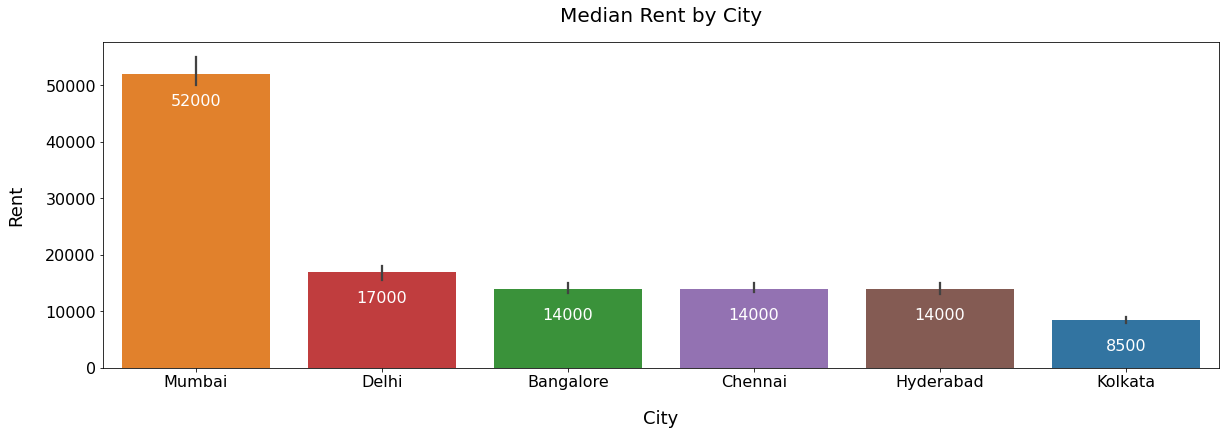

In [55]:
plt.figure(figsize=(20,6))
ax = sns.barplot(x='City', y='Rent', data=df, hue='City', estimator='median', order=cities_sorted_by_median_rent.index)

ax.set_title('Median Rent by City', fontsize=20, pad=20)
ax.set_xlabel('City', fontsize=18, labelpad=20)
ax.set_ylabel('Rent', fontsize=18, labelpad=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

for bar in ax.patches:
    ax.annotate(
        text=int(bar.get_height()), 
        xy=(bar.get_x() + 0.4, bar.get_height() - 6000), 
        ha='center',
        va='bottom',
        fontsize=16,
        color='white'
    )

plt.draw()

### Multivariate Analysis

Mean, median, max and min rents grouped by city, BHK, furnishing status and bathrooms

In [ ]:
groups = ['City', 'BHK','Furnishing Status', 'Bathroom']
df.groupby(by=groups)['Rent'].agg(['mean', 'median', 'max', 'min'])

Average Rent by City and BHK

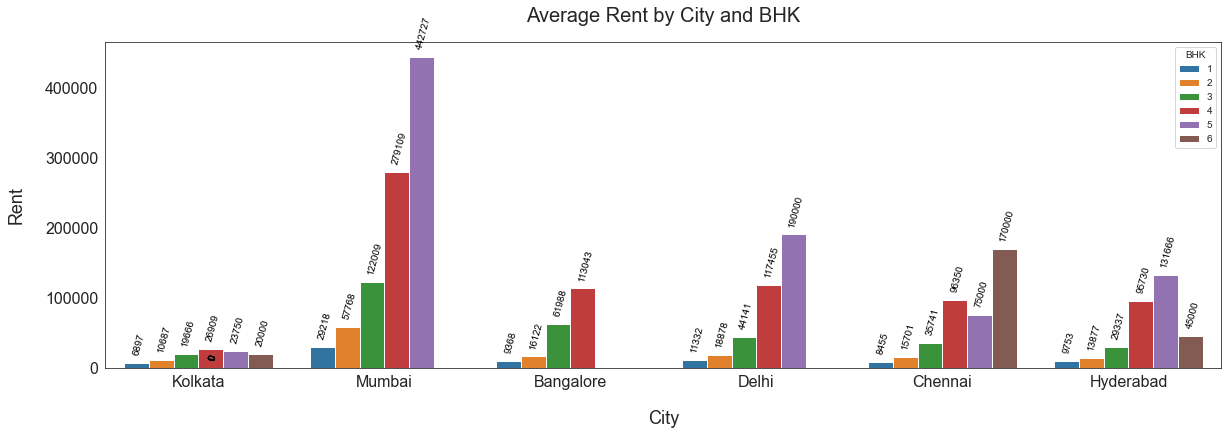

In [29]:
plt.figure(figsize=(20,6))
ax = sns.barplot(
    x='City',
    y='Rent',
    hue='BHK',
    data=df,
    estimator='mean',
    errorbar=None,
    palette='tab10'
)

ax.set_title('Average Rent by City and BHK', fontsize=20, pad=20)
ax.set_xlabel('City', fontsize=18, labelpad=20)
ax.set_ylabel('Rent', fontsize=18, labelpad=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

for p in ax.patches:
    ax.annotate(
        text=int(p.get_height()), 
        xy=(p.get_x() + .08, p.get_height() + 10000),
        ha='center',
        va='bottom',
        color='Black',
        rotation=75)

plt.draw()

Average Rent by City and Furnishing Status

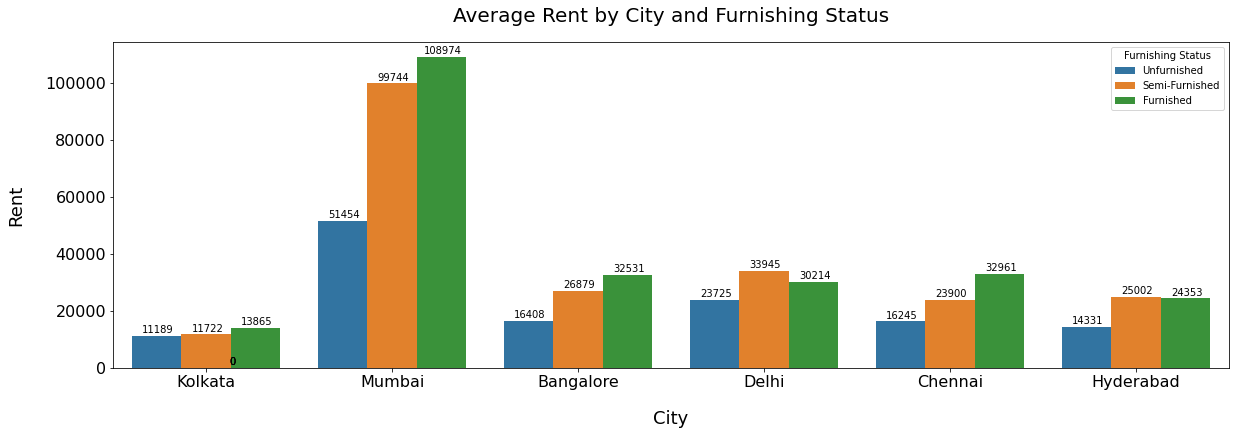

In [57]:
plt.figure(figsize=(20,6))
ax = sns.barplot(
    x='City',
    y='Rent',
    hue='Furnishing Status',
    data=df,
    estimator='mean',
    errorbar=None,
    palette='tab10'
)

ax.set_title('Average Rent by City and Furnishing Status', fontsize=20, pad=20)
ax.set_xlabel('City', fontsize=18, labelpad=20)
ax.set_ylabel('Rent', fontsize=18, labelpad=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

for p in ax.patches:
    ax.annotate(
        text=int(p.get_height()), 
        xy=(p.get_x() + .14, p.get_height() + 500),
        ha='center',
        va='bottom',
        color='Black')

plt.draw()

## Feature Engineering

In [58]:
posted_on = pd.to_datetime(df['Posted On'], format="%Y-%m-%d")
df['Posted On'] = ((posted_on - posted_on.min()) / pd.Timedelta(days=1)).astype(pd.Int16Dtype())

In [59]:
df['BHK'] = df['BHK'].astype(pd.Int16Dtype())

In [60]:
df['Rent'] = df['Rent'].astype(pd.Int32Dtype())

In [61]:
df['Size'] = df['Size'].astype(pd.Int16Dtype())

In [62]:
import re
floor = df['Floor'].str.replace('Ground', '0', regex=True, flags=re.IGNORECASE)
floor = floor.str.replace('Upper Basement', '-1', regex=True, flags=re.IGNORECASE)
floor = floor.str.replace('Lower Basement', '-2', regex=True, flags=re.IGNORECASE)
floor = floor.str.extract(r'(-?\w+)(\sout\sof\s(\d+))?', expand=True).drop(columns=[1]).astype(pd.Int16Dtype())
floor = floor.rename(columns={0: 'On Floor', 2: 'Total Floors'})
df = df.drop(columns=['Floor']).join(floor)
df['Total Floors'] = df['Total Floors'].fillna(int(df['Total Floors'].median()))

In [63]:
df['Is On Top Floor'] = df['On Floor'] + 1 == df['Total Floors']

In [64]:
df['Is On Ground Floor'] = df['On Floor'] == 0

In [65]:
df['Is A Basement'] = df['On Floor'] < 0

In [66]:
df['Bathroom'] = df['Bathroom'].astype(pd.Int8Dtype())

In [67]:
city_code_dict = dict(zip(cities_sorted_by_median_rent.index, range(len(cities_sorted_by_median_rent))))
print(city_code_dict)
df['City'] = df['City'].map(city_code_dict).astype(pd.Int8Dtype())

{'Mumbai': 0, 'Delhi': 1, 'Bangalore': 2, 'Chennai': 3, 'Hyderabad': 4, 'Kolkata': 5}


In [68]:
tenant_dummies = df['Tenant Preferred'].str.get_dummies('/').astype(pd.BooleanDtype())
df.drop(columns=['Tenant Preferred'], inplace=True)
df = df.join(tenant_dummies.add_suffix(' is preferred'))

In [69]:
furnishsing_code_dict = dict(zip(df['Furnishing Status'].unique(), [0, 1, 2]))
print(furnishsing_code_dict)
df['Furnishing Status'] = df['Furnishing Status'].map(furnishsing_code_dict).astype(pd.Int8Dtype())

{'Unfurnished': 0, 'Semi-Furnished': 1, 'Furnished': 2}


In [70]:
point_of_contact_dict = dict(zip(df['Point of Contact'].unique(), [0, 1, 1]))
print(point_of_contact_dict)
df['Point of Contact'] = df['Point of Contact'].map(point_of_contact_dict).astype(pd.Int8Dtype())

{'Contact Owner': 0, 'Contact Agent': 1, 'Contact Builder': 1}


In [71]:
area_type_dict = dict(zip(df['Area Type'].unique(), [2, 1, 0]))
print(area_type_dict)
df['Area Type'] = df['Area Type'].map(area_type_dict).astype(pd.Int8Dtype())

{'Super Area': 2, 'Carpet Area': 1, 'Built Area': 0}


In [72]:
locality = df['Area Locality'].str.split(',', expand=True)[0].str.replace('in', '').str.strip().str.lower()
locality_names_asc = locality.value_counts().sort_values().index
locality_codes_dict = {name: i for i, name in enumerate(locality_names_asc)}
df.drop(columns=['Area Locality'], inplace=True)
df['Locality'] =  locality.map(locality_codes_dict)

In [73]:
categorical_column_names = df.dtypes[df.dtypes == 'category'].keys()
for column_name in categorical_column_names:
    df[column_name + ' Encoded'] = df[column_name].cat.codes
df.drop(columns=categorical_column_names, inplace=True) 

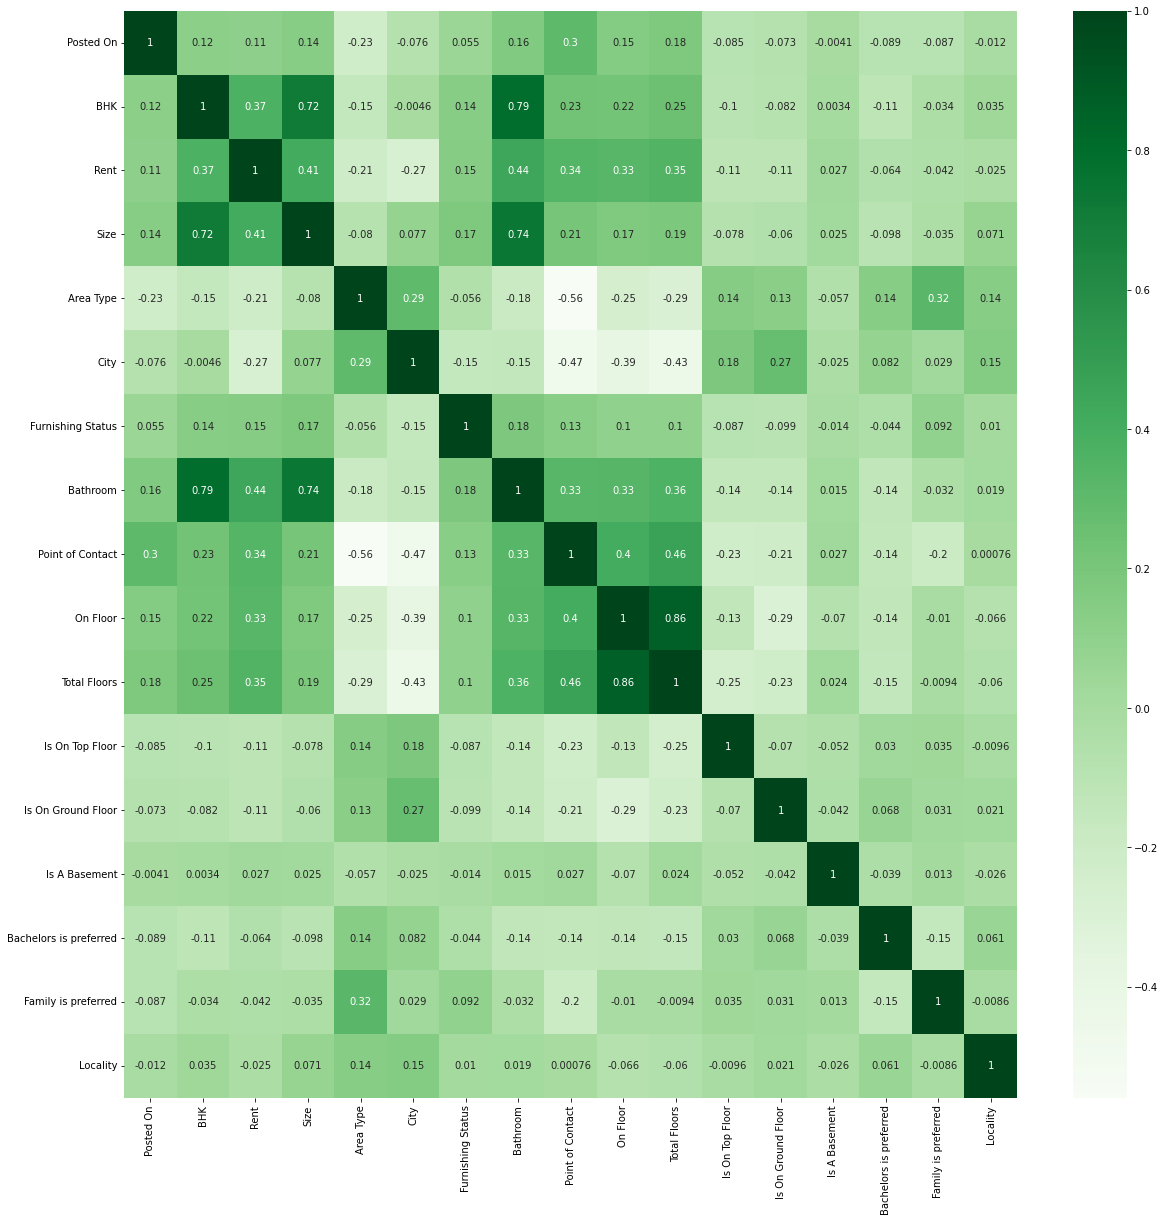

In [81]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='Greens')
plt.draw()

## Model Training

In [24]:
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=['Rent'])
X = StandardScaler().fit_transform(X)
X[0]

array([-0.94125309, -0.10077301,  0.2089605 ,  0.96888131, -1.59524032,
       -1.11157455,  0.03859399, -0.68974363, -0.59517645, -0.52518269,
       -0.61323   ,  2.02971454, -0.0849448 ,  0.3323179 ,  0.46038133,
        0.17146445])

In [25]:
y = df['Rent'].to_numpy()
y[0]

10000

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)

In [27]:
# baseline
from sklearn.dummy import DummyRegressor
dummy_regressor = DummyRegressor(strategy='median')

In [28]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

In [29]:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [30]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV()
alpha = lasso_cv.fit(X, y).alpha_
alpha

56.158130381592755

In [31]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=alpha) # 56

## Model Evaluation

In [32]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True)

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, make_scorer

def mean_cross_val_r2_score(estimator):
    cv_score = cross_val_score(
        estimator=estimator,
        X=X,
        y=y,
        cv=kf,
        scoring=make_scorer(r2_score),
        n_jobs=None
    )
    return cv_score.mean()

for estimator in [
    dummy_regressor, # baseline
    linear_regression, 
    ridge, 
    lasso
]:
    print(f'{estimator.__class__.__name__}: {mean_cross_val_r2_score(estimator)}')

DummyRegressor: -0.08340994757103233
LinearRegression: 0.392730089821543
Ridge: 0.40745938350762956
Lasso: 0.4109191942814979


In [ ]:
imputing missing values
finding outliers
cleaning
pre-processing
de-duplication
